## برسی فرضیه سوم

### شرح فرضیه: بازه طول جغرافیایی که دارای بیشترین تعداد خانه اجاره شده است، میانگین قیمتی پایین تری نسبت به میانگین قیمتی کل خانه های اجاره شده دارد. 



فایل دیتاست را آپلود کرده و درون برنامه میخوانیم.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
plt.style.use('seaborn-white')

data = files.upload()

csv = pd.read_csv(io.StringIO(data['AB_NYC_2019.csv'].decode('utf-8')))



Saving AB_NYC_2019.csv to AB_NYC_2019.csv


به منظور تشخیص بازه با بیشترین تعداد خانه اجاره شده، نموندار هیستوگرام مربوط به طول جغرافیایی را میکشیم

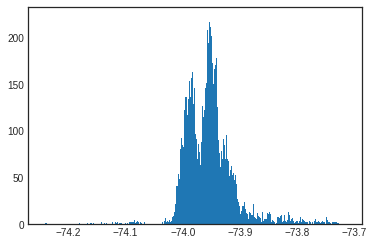

In [13]:
plt.hist(csv['longitude'],bins=2000);

مشاهده میشود که بیشترین تعداد خانه اجاره داده شده در بازه طول جغرافیایی 
-73.9
تا 
-74
قرار دارند.


یک دیتاست جدید میسازیم که فقط اطلاعات قرارداد هایی را داشته باشد که طول جغرافیایی آنها در بازه مذکور قرار دارد

In [21]:
isValid1 = csv.longitude >= -74
isValid2 = csv.longitude <= -73.9
new_df = csv[isValid1]
new_df = new_df[isValid2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(array([20., 13., 18., ...,  7.,  7.,  4.]),
 array([-74.     , -73.99995, -73.9999 , ..., -73.9001 , -73.90005,
        -73.9    ]),
 <a list of 2000 Patch objects>)

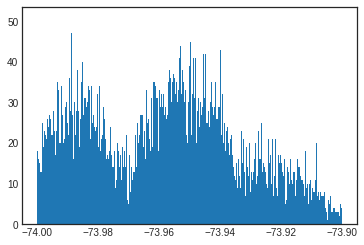

In [23]:
plt.hist(new_df['longitude'],bins=2000)

نمودار هسیتوگرام دیتاست فیلتر شده را ترسیم میکنیم مشاهده میشود که همه داده ها به درستی در بازه تعیین شده قراردارند

مقدار میانگین قیمت کل قرارداد ها و مقدار میانگین قرارداد هایی که طول جغرافیایی مطلوب را دارند به طور جداگانه حساب میکنیم


In [24]:
total_price_mean = csv['price'].mean()
specific_price_mean = new_df['price'].mean()

In [26]:
print(total_price_mean)
print(specific_price_mean)

152.7206871868289
151.8987860137149


مشاهده میشود که فرضیه ما درست بوده است و میانگین قیمت در این بازه از میانگین قیمت کل قرارداد ها کمی کمتر است. حال میتوان ادعا کرد که دلیل تراکم بالای اجاره ها در این بازه طول جغرافیایی، قیمت ارزان تر آن به نسبت دیگر مناطق بوده است.

## برسی فرضیه چهارم
### شرح فرضیه: دلیل تراکم بالای اجاره ها در این بازه طول جغرافیایی، قیمت ارزان تر آن به نسبت دیگر مناطق بوده است.

دو دیتاست از به طور جداگانه از قرارداد های با طول جغرافیایی بیشتر از کران بالای بازه قبلی و از قرارداد های با طول جغرافیایی کماتر از کران پایین بازه قبلی میسازیم

In [27]:
higher_longitude_df = csv[csv.longitude > -73.9]
lower_longitude_df = csv[csv.longitude < -74]

مقدار میانگین قیمت قرارداد ها در این دو بازه را محاسبه میکنیم

In [28]:
higher_longitude_mean = higher_longitude_df['price'].mean()
lower_longitude_mean = lower_longitude_df['price'].mean()

In [31]:
print('total price mean:  ' + str(total_price_mean))
print('specific range price:  '  + str(specific_price_mean))
print('higher range price:  ' + str(higher_longitude_mean))
print('lower range price: ' + str(lower_longitude_mean))

total price mean:  152.7206871868289
specific range price:  151.8987860137149
higher range price:  93.99702528507684
lower range price: 228.11330734966592


با توجه به اینکه میانگین قیمت در بازه طول جغرافیایی بزرگتر از کران بالای بازه مطلوب ما، کمتر است از میانگین قیمت در بازه مطلوب، ادعای ما رد میشود چرا که اگر قیمت پایین دلیل تراکم بالای قرارداد ها در آن منطقه بود باید تراکم قرارداد ها در این بازه که میانگین قیمت کمتری دارد بیشتر میبود
